In [ ]:
%pip install flaml[notebook]==1.0.10

In [ ]:
#from sklearn.datasets import load_breast_cancer
#df = load_breast_cancer()
#x = df.data
#y = df.target
#x_train, x_test, y_train, y_test=train_test_split(x, y, test_size = 0.2, random_state = 100)

NameError: name 'train_test_split' is not defined

In [ ]:
from flaml.data import load_openml_dataset
X_train, X_test, y_train, y_test = load_openml_dataset(dataset_id=1510, data_dir='./')
print("Data type:", type(X_train), type(y_train))
print("The first 5 rows of X_train:")
print(X_train.head())
print("The first 5 rows of y_train:")
print(y_train.head())

load dataset from ./openml_ds1510.pkl
Dataset name: wdbc
X_train.shape: (426, 30), y_train.shape: (426,);
X_test.shape: (143, 30), y_test.shape: (143,)
Data type: <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
The first 5 rows of X_train:
        V1     V2      V3      V4       V5       V6        V7        V8  \
293  11.85  17.46   75.54   432.7  0.08372  0.05642  0.026880  0.022800   
332  11.22  19.86   71.94   387.3  0.10540  0.06779  0.005006  0.007583   
565  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.144000  0.097910   
278  13.59  17.84   86.24   572.3  0.07948  0.04052  0.019970  0.012380   
489  16.69  20.20  107.10   857.6  0.07497  0.07112  0.036490  0.023070   

         V9      V10  ...    V21    V22     V23     V24     V25      V26  \
293  0.1875  0.05715  ...  13.06  25.75   84.35   517.8  0.1369  0.17580   
332  0.1940  0.06028  ...  11.98  25.78   76.91   436.1  0.1424  0.09669   
565  0.1752  0.05533  ...  23.69  38.25  155.00  1731.0

In [ ]:
from flaml import AutoML
automl = AutoML()

In [ ]:
settings = {
    "time_budget": 300,  # total running time in seconds
    "metric": 'accuracy',  # can be: 'r2', 'rmse', 'mae', 'mse', 'accuracy', 'roc_auc', 'roc_auc_ovr',
                           # 'roc_auc_ovo', 'log_loss', 'mape', 'f1', 'ap', 'ndcg', 'micro_f1', 'macro_f1'
    "task": 'classification',  # task type
    "log_file_name": 'breast_cancer.log',  # flaml log file
    "seed": 340192,    # random seed
}

In [ ]:
automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl: 10-06 15:55:12] {2540} INFO - task = classification
[flaml.automl: 10-06 15:55:12] {2542} INFO - Data split method: stratified
[flaml.automl: 10-06 15:55:12] {2545} INFO - Evaluation method: cv
[flaml.automl: 10-06 15:55:12] {2664} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 10-06 15:55:13] {2806} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 10-06 15:55:13] {3108} INFO - iteration 0, current learner lgbm
[flaml.automl: 10-06 15:55:13] {3241} INFO - Estimated sufficient time budget=1100s. Estimated necessary time budget=27s.
[flaml.automl: 10-06 15:55:13] {3288} INFO -  at 0.4s,	estimator lgbm's best error=0.0963,	best estimator lgbm's best error=0.0963
[flaml.automl: 10-06 15:55:13] {3108} INFO - iteration 1, current learner lgbm
[flaml.automl: 10-06 15:55:13] {3288} INFO -  at 0.6s,	estimator lgbm's best error=0.0963,	best estimator lgbm's best error=0.0963
[flaml.aut

In [ ]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 11, 'learning_rate': 0.07357413194710388, 'n_estimators': 49}
Best accuracy on validation data: 0.9742
Training duration of best run: 0.343 s


In [ ]:
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)
print('True labels', y_test)
y_pred_proba = automl.predict_proba(X_test)[:,1]

Predicted labels ['2' '1' '1' '1' '1' '1' '1' '1' '1' '1' '2' '1' '1' '2' '1' '2' '1' '2'
 '2' '2' '2' '2' '1' '1' '2' '1' '1' '2' '1' '2' '1' '2' '1' '2' '1' '2'
 '1' '2' '1' '2' '2' '1' '2' '1' '1' '2' '1' '1' '1' '2' '2' '2' '2' '1'
 '1' '1' '1' '1' '1' '2' '2' '2' '1' '1' '2' '1' '2' '2' '2' '1' '1' '2'
 '1' '2' '2' '1' '1' '1' '1' '1' '2' '2' '2' '1' '2' '1' '1' '1' '2' '2'
 '1' '1' '1' '2' '1' '1' '2' '1' '1' '1' '1' '1' '1' '1' '2' '1' '2' '1'
 '1' '2' '1' '2' '2' '1' '1' '1' '1' '1' '1' '1' '1' '1' '2' '1' '2' '1'
 '1' '1' '1' '1' '2' '1' '1' '1' '1' '1' '1' '2' '2' '1' '1' '1' '2']
True labels 512    2
457    1
439    1
298    1
37     1
      ..
236    2
113    1
527    1
76     1
162    2
Name: Class, Length: 143, dtype: category
Categories (2, object): ['1' < '2']


In [ ]:
from flaml.ml import sklearn_metric_loss_score
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.972027972027972
roc_auc = 0.9983228511530399
log_loss = 0.07575514808050171


In [ ]:
from flaml.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename=settings['log_file_name'], time_budget=240)
for config in config_history:
    print(config)

{'Current Learner': 'lgbm', 'Current Sample': 426, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}}
{'Current Learner': 'lgbm', 'Current Sample': 426, 'Current Hyper-parameters': {'n_estimators': 10, 'num_leaves': 4, 'min_child_samples': 18, 'learning_rate': 0.2293009676418639, 'log_max_bin': 9, 'colsample_bytree': 0.9086551727646448, 'reg_alpha': 0.0015561782752413472, 'reg_lambda': 0.33127416269768944}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 10, 'num_leaves': 4, 'min_child_samples': 18, 'learning_rate': 0.2293009676418639, 'log_max_bin': 9, 'colsample_bytre

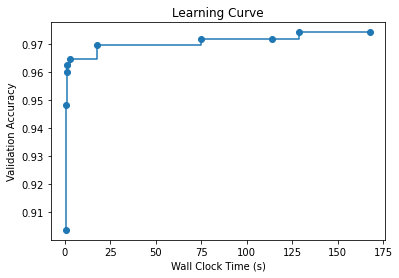

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()

In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()

In [ ]:
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
y_pred_lgbm = lgbm.predict(X_test)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
cat_columns = X_train.select_dtypes(include=['category']).columns
X = X_train.copy()
X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)

In [ ]:
xgb.fit(X, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
X = X_test.copy()
X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)
y_pred_xgb = xgb.predict(X)

In [ ]:
y_test = [int(x) for x in np.array(y_test)]
y_pred_lgbm = [int(x) for x in np.array(y_pred_lgbm)]
y_pred = [int(x) for x in np.array(y_pred)]
#print (y_pred_lgbm)

In [ ]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()

In [ ]:
cat.fit(X_train, y_train)

Learning rate set to 0.007156
0:	learn: 0.6819481	total: 5.54ms	remaining: 5.54s
1:	learn: 0.6713063	total: 10.1ms	remaining: 5.03s
2:	learn: 0.6604895	total: 14.5ms	remaining: 4.83s
3:	learn: 0.6505693	total: 19.2ms	remaining: 4.79s
4:	learn: 0.6391802	total: 23.5ms	remaining: 4.68s
5:	learn: 0.6304709	total: 28.3ms	remaining: 4.69s
6:	learn: 0.6204768	total: 33ms	remaining: 4.68s
7:	learn: 0.6110502	total: 37.4ms	remaining: 4.64s
8:	learn: 0.6009110	total: 41.9ms	remaining: 4.61s
9:	learn: 0.5919256	total: 46.4ms	remaining: 4.6s
10:	learn: 0.5825817	total: 50.6ms	remaining: 4.55s
11:	learn: 0.5734551	total: 55.3ms	remaining: 4.55s
12:	learn: 0.5652629	total: 59.3ms	remaining: 4.5s
13:	learn: 0.5570911	total: 64ms	remaining: 4.5s
14:	learn: 0.5493505	total: 67.9ms	remaining: 4.46s
15:	learn: 0.5414459	total: 72.2ms	remaining: 4.44s
16:	learn: 0.5340011	total: 76.6ms	remaining: 4.43s
17:	learn: 0.5261151	total: 80.6ms	remaining: 4.4s
18:	learn: 0.5192322	total: 85.3ms	remaining: 4.41s


In [ ]:
y_pred_cat = cat.predict(X_test)

In [ ]:
print('default xgboost accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred_xgb, y_test))
print('default lgbm accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred_lgbm, y_test))
print('default catboost accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred_cat, y_test))
print('flaml (5 min) accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

default xgboost accuracy = 0.006993006993006978
default lgbm accuracy = 0.972027972027972
default catboost accuracy = 0.013986013986013957
flaml (5 min) accuracy = 0.972027972027972
r2 = 0.880083857442348
mse = 0.027972027972027972
mae = 0.027972027972027972


In [ ]:
predict = automl.predict(X_test)
predict = [int(x) for x in np.array(predict)]
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98        90
           2       0.96      0.96      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
#from xgboost import XGBRegressor

#xgb = XGBRegressor()
#xgb.fit(X_train, y_train)
#y_pred = xgb.predict(X_test)
#from flaml.ml import sklearn_metric_loss_score
#print('default xgboost r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))

default xgboost r2 = -3.074515210824135
